In [1]:
from sklearn.datasets import load_breast_cancer
import mglearn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
SEED = 42

In [2]:
from matplotlib import font_manager, rc 
import matplotlib.font_manager as fm

for font_path in fm.findSystemFonts(fontpaths = None, fontext = 'ttf'):
    if 'D2Coding' in font_path:
        font = font_manager.FontProperties(fname=font_path).get_name()
        rc('font', family=font)
        break 

In [3]:
cancer = load_breast_cancer()
X_tr, X_te, y_tr, y_te = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=SEED
)

In [4]:
pd.DataFrame(cancer.data, columns=cancer.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# 선형 서포트벡터 머신(Linear SVM)

- SVM은 클래스를 구분하는 분류 문제에서 각 클래스를 잘 구분하는 선을 그어주는 방식이다.
- 두 클래스의 가운데 선을 그어줄 때, 가장 가까이 있는 점들을 Support vector라고 하며, 찾은 직선과 서포트벡터 사이의 거리를 최대 마진(margin)이라고 한다.
- 마진을 최대로 하는 서포트벡터와 클래스 구분 직선을 찾는 것이 목표이다.

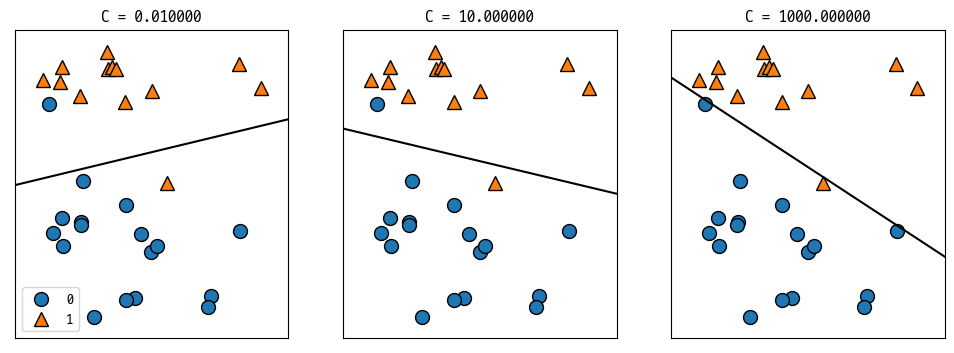

In [5]:
mglearn.plots.plot_linear_svc_regularization()

In [6]:
from sklearn.svm import LinearSVC

In [7]:
lsvc = LinearSVC().fit(X_tr, y_tr)
print(f'훈련용 평가지표: {lsvc.score(X_tr, y_tr)} / 테스트용 평가지표: {lsvc.score(X_te, y_te)}')

훈련용 평가지표: 0.8802816901408451 / 테스트용 평가지표: 0.8741258741258742


c:\Users\workspace\lectures\git_practice\data_engineering\practices\.venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [8]:
lsvc1000 = LinearSVC(C=1000).fit(X_tr, y_tr)
print(f"훈련용 평가지표: {lsvc1000.score(X_tr, y_tr)} / 테스트용 평가지표: {lsvc1000.score(X_te, y_te)}")

훈련용 평가지표: 0.9342723004694836 / 테스트용 평가지표: 0.9300699300699301


c:\Users\workspace\lectures\git_practice\data_engineering\practices\.venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [9]:
lsvc0001 = LinearSVC(C=0.001).fit(X_tr, y_tr)
print(f"훈련용 평가지표: {lsvc0001.score(X_tr, y_tr)} / 테스트용 평가지표: {lsvc0001.score(X_te, y_te)}")

훈련용 평가지표: 0.9295774647887324 / 테스트용 평가지표: 0.9440559440559441


c:\Users\workspace\lectures\git_practice\data_engineering\practices\.venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


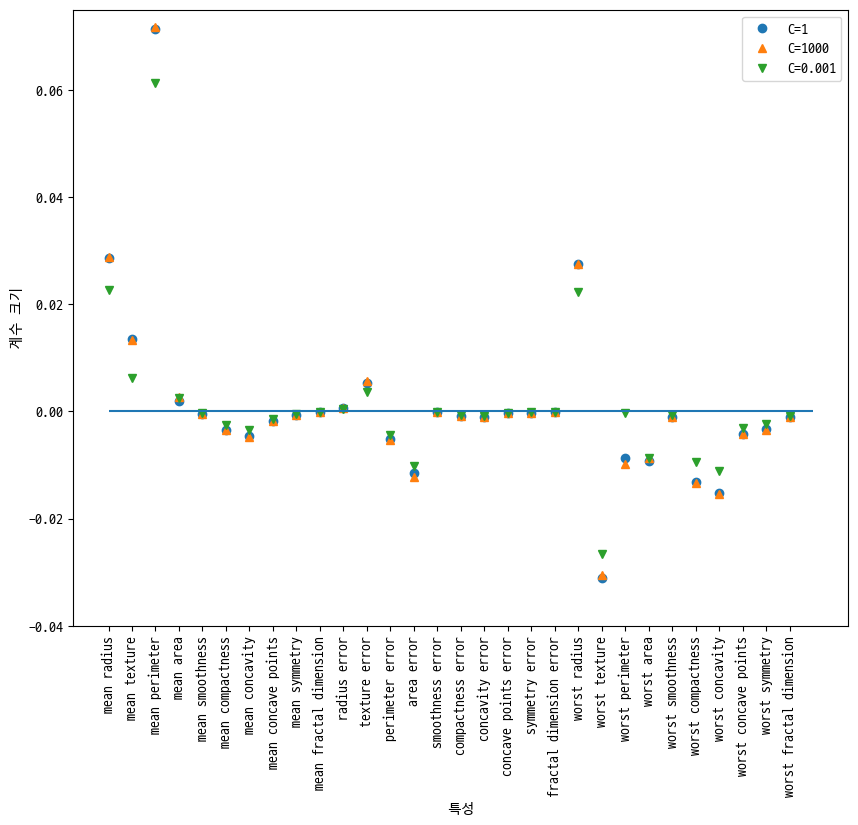

In [10]:
plt.figure(figsize=(10, 8))

plt.plot(lsvc.coef_.T, 'o', label="C=1")
plt.plot(lsvc1000.coef_.T, '^', label="C=1000")
plt.plot(lsvc0001.coef_.T, 'v', label="C=0.001")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-0.04, 0.075)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

모델마다 Hyperparameter의 영향을 크게 받는 것이 있고, 적게 받는 것이 있다.
- 회귀 모델은 대체적으로 영향을 크게 받는다
- 분류 모델은 대체적으로 영향을 적게 받는다

# 의사 결정 나무(Decision Tree)

- 회귀, 분류 둘 다 사용 가능한 알고리즘
- 여러가지 규칙을 순차적으로 적용하면서 트리 기반의 규칙을 만들어 예측하는 알고리즘
- 데이터를 분할하여 순수도가 높은 방향으로 규칙을 정한다
- 순수도
    - 평가 지표가 얼마나 데이터를 잘 나누는지를 평가하는 척도
    - 각 노드의 규칙에 의해 동일한 클래스가 포함되는 정도를 의미
    - 부모 노드의 순수도에 비해 자식 노드들의 순수도가 증가하도록 트리를 형성  
<br>
- 순수도의 척도
    - entropy: 엔트로피는 데이터의 혼자도를 의미. 엔트로피 값이 0이 될 때까지 계층이 만들어진다.
    - gini: gini(불평등지수) 값이 0이면 평등하다는 것을 뜻한다. gini값이 0이 될 때까지 계층이 만들어진다.
    - gini, entropy값이 0에 가까울수록 순수도가 높다는 뜻이다.  
<br>
- Hyperparameters
    - root node: 최상단에 위치한 노드(시작점)
    - leaf node: 더 이상의 규칙을 더할 수 없는 노드(결정된 클래스값)
    - max nodes: 노드 갯수의 최대값. entropy/gini값이 0이 되지 않았더라도 해당 갯수 이상으로 노드를 만들지 않는다.
    - min samples split: 해당 노드가 갖고 있는 최소한의 샘플 갯수
    - min samples leaf: 또 다른 노드를 만들 수 있는 최소한의 샘플 갯수 조건

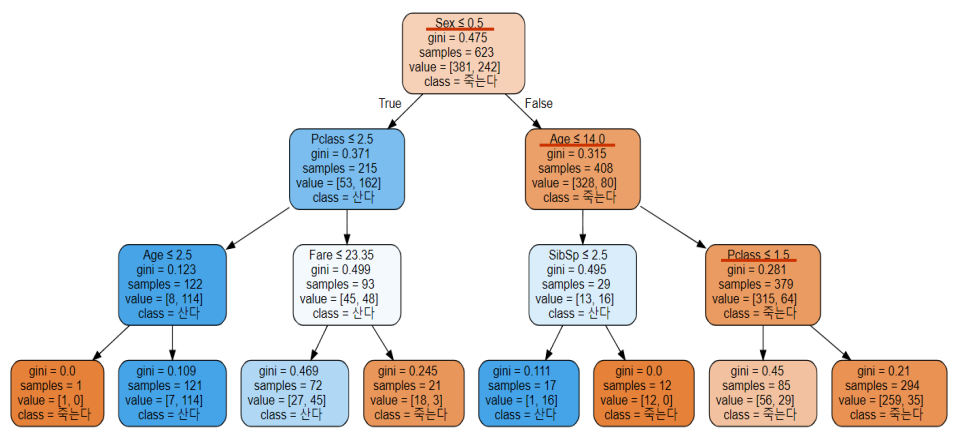

조건  
gini  
조건으로 분류할 샘플 수  

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
tree = DecisionTreeClassifier(random_state=SEED).fit(X_tr, y_tr)
print(f"훈련용 평가지표: {tree.score(X_tr, y_tr)} / 테스트용 평가지표: {tree.score(X_te, y_te)}")

훈련용 평가지표: 1.0 / 테스트용 평가지표: 0.9230769230769231


훈련용 평가지표가 1.0으로 과적합이 발생한 상황이다.

In [13]:
hp = {
    "random_state": SEED,
    "max_depth": 4, # 최대 깊이
    "min_samples_split": 2, # 노드 분할을 위한 최소 샘플 수
    "criterion": "entropy", # 사용할 순수도 척도
    "max_leaf_nodes": 10, # 최대 리프 노드 수
    "min_samples_leaf": 20, # 리프 노드에 있어야 할 최소 샘플 수
}

tree = DecisionTreeClassifier(**hp).fit(X_tr, y_tr)
print(f"훈련용 평가지표: {tree.score(X_tr, y_tr)} / 테스트용 평가지표: {tree.score(X_te, y_te)}")

훈련용 평가지표: 0.9460093896713615 / 테스트용 평가지표: 0.916083916083916


각 feature의 중요도 확인

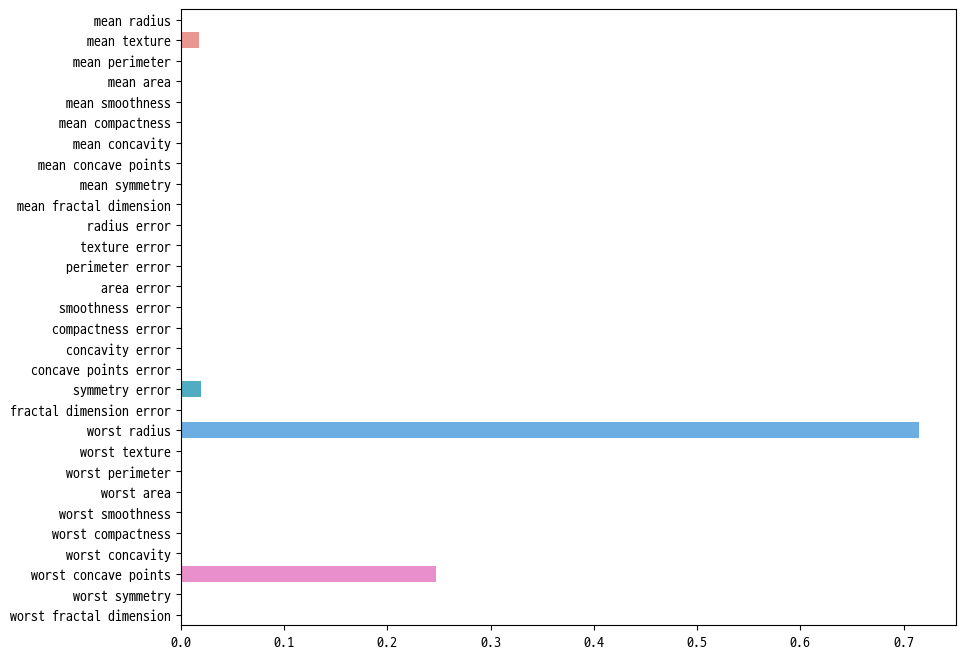

In [14]:
plt.figure(figsize=(10, 8))

sns.barplot(x=tree.feature_importances_, y=cancer.feature_names)
plt.show()

In [15]:
pd.DataFrame(tree.feature_importances_, index=cancer.feature_names).sort_values(0, ascending=False)

,0
worst radius,0.714716
worst concave points,0.247575
symmetry error,0.019837
mean texture,0.017872
mean radius,0.000000
worst symmetry,0.000000
worst concavity,0.000000
worst compactness,0.000000
worst smoothness,0.000000
worst area,0.000000


In [16]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree, out_file="tree.dot", class_names=["악성", "양성"],
    feature_names=cancer.feature_names, impurity=False, filled=True
)

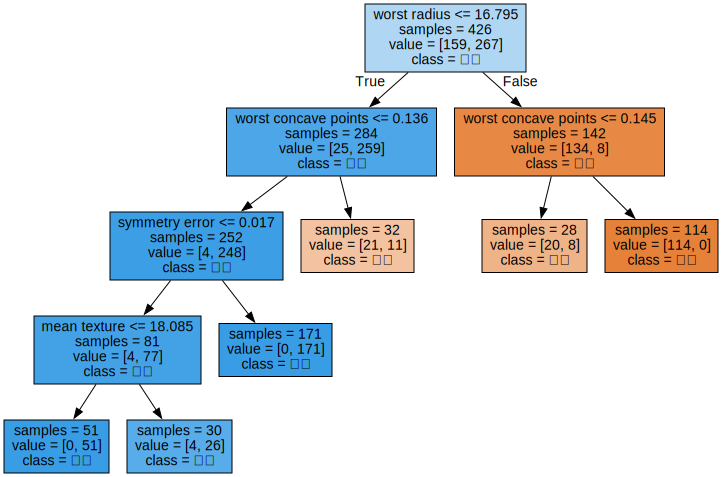

In [17]:
import graphviz

with open("tree.dot", encoding="utf-8") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

# K-최근접 이웃(K-NN)

- 최근접 이웃 알고리즘
- 새로운 샘플의 K개의 가까운 이웃을 이용하여 예측
- 제일 가까운 데이터 포인트를 찾아서 결정
- 회귀, 분류 둘 다 사용 가능한 알고리즘

c:\Users\workspace\lectures\git_practice\data_engineering\practices\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


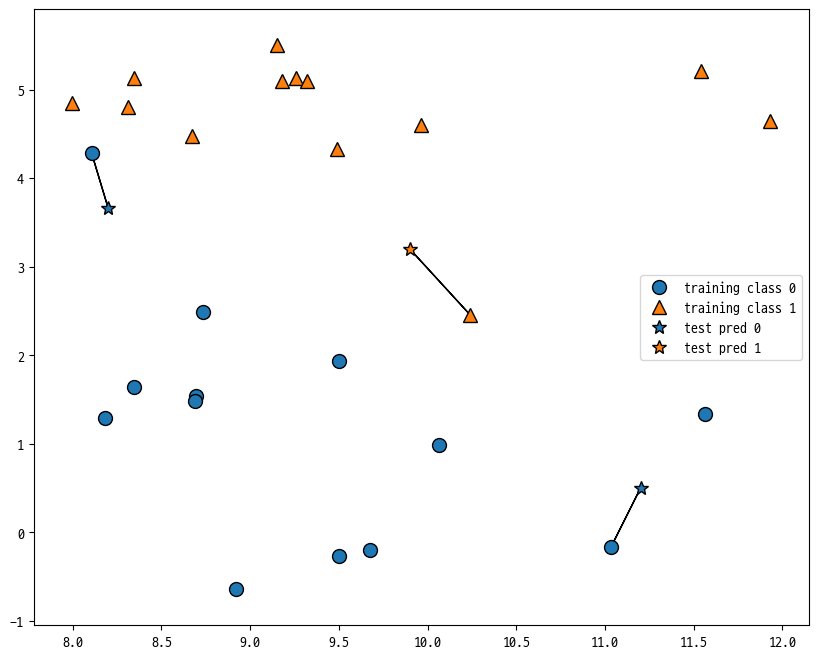

In [18]:
plt.figure(figsize=(10,8))

mglearn.plots.plot_knn_classification(n_neighbors=1)

In [19]:
from sklearn.neighbors import KNeighborsClassifier 

In [20]:
X, y = mglearn.datasets.make_forge() 
X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=0)

c:\Users\workspace\lectures\git_practice\data_engineering\practices\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [21]:
clf = KNeighborsClassifier(n_neighbors=3).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {clf.score(X_tr, y_tr)} / 테스트용 평가지표: {clf.score(X_te, y_te)}')

훈련용 평가지표: 0.9473684210526315 / 테스트용 평가지표: 0.8571428571428571


In [26]:
for neighbor in range(1, 20):
    clf = KNeighborsClassifier(n_neighbors=neighbor).fit(X_tr, y_tr)
    print(f"neighbor: {neighbor}")
    print(f'훈련용 평가지표: {clf.score(X_tr, y_tr)} / 테스트용 평가지표: {clf.score(X_te, y_te)}')

neighbor: 1
훈련용 평가지표: 1.0 / 테스트용 평가지표: 0.8571428571428571
neighbor: 2
훈련용 평가지표: 0.9473684210526315 / 테스트용 평가지표: 0.8571428571428571
neighbor: 3
훈련용 평가지표: 0.9473684210526315 / 테스트용 평가지표: 0.8571428571428571
neighbor: 4
훈련용 평가지표: 0.9473684210526315 / 테스트용 평가지표: 0.8571428571428571
neighbor: 5
훈련용 평가지표: 0.9473684210526315 / 테스트용 평가지표: 0.8571428571428571
neighbor: 6
훈련용 평가지표: 0.9473684210526315 / 테스트용 평가지표: 0.8571428571428571
neighbor: 7
훈련용 평가지표: 0.9473684210526315 / 테스트용 평가지표: 0.8571428571428571
neighbor: 8
훈련용 평가지표: 0.9473684210526315 / 테스트용 평가지표: 0.8571428571428571
neighbor: 9
훈련용 평가지표: 0.9473684210526315 / 테스트용 평가지표: 0.8571428571428571
neighbor: 10
훈련용 평가지표: 0.9473684210526315 / 테스트용 평가지표: 0.8571428571428571
neighbor: 11
훈련용 평가지표: 0.8947368421052632 / 테스트용 평가지표: 0.8571428571428571
neighbor: 12
훈련용 평가지표: 0.8947368421052632 / 테스트용 평가지표: 0.8571428571428571
neighbor: 13
훈련용 평가지표: 0.8947368421052632 / 테스트용 평가지표: 0.8571428571428571
neighbor: 14
훈련용 평가지표: 0.9473684210526315 / 테스트용 평가지표: 0.85714